# Correlations + Plots

In [1]:
import torch
import numpy as np

import pickle
import glob
import os
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
%matplotlib inline

from models import *
from utils import *

%load_ext autoreload
%autoreload 2

import itertools
import pandas as pd
pd.set_option('display.max_rows', None)

device = torch.device("cpu")
if torch.cuda.is_available():
    print('CUDA is available!')
    device = torch.device("cuda")
else:
    print('CUDA is not available...')

CUDA is available!


# Load Data

In [2]:
# all_results = []
# for file in glob.glob("assets/*.pkl"):
#     with open(file, 'rb') as handle:
#         data = pickle.load(handle)
#         try:
#             for r in data:
#                 x = r.pop('adversaries', None)
#         except:
#             pass 
#         try:
#             for r in data:
#                 x = r.pop('inputs', None)
#         except:
#             pass
#         try:
#             for r in data:
#                 x = r.pop('targets', None)
#         except:
#             pass
#         try:
#             for r in data:
#                 x = r.pop('classes', None)
#         except:
#             pass
       
#     all_results.append(data)

In [4]:
# all_results = list(itertools.chain.from_iterable(all_results))

In [52]:
# pickle.dump(all_results, open('assets/all_metadata_2020.03.04.pkl', "wb"))

In [3]:
with open('assets/all_metadata_2020.03.04.pkl', 'rb') as handle:
    all_results = pickle.load(handle)

In [5]:
target_features = ['model',
                   'attack',
                   'confidence',
                   'epsilon',
                   'regularization_weight',
                   'attack_success_rate',
                   'neuron_coverage_000',
                   'neuron_coverage_020',
                   'neuron_coverage_050',
                   'neuron_coverage_075',
                   'inception_score',
                   'fid_score_2048',
                   'output_impartiality']

In [6]:
df = pd.DataFrame(all_results)[target_features]
df['attack'].replace('NA', np.NaN, inplace=True)
df = df[pd.notnull(df['attack'])]

In [8]:
df['regularization_weight'] = pd.to_numeric(df['regularization_weight'], errors='coerce')
df['attack_success_rate'] = pd.to_numeric(df['attack_success_rate'], errors='coerce')
df['fid_score_2048'] = pd.to_numeric(df['fid_score_2048'], errors='coerce')
df['output_impartiality'] = pd.to_numeric(df['output_impartiality'], errors='coerce')

In [9]:
df

model             attack  confidence  epsilon  \
0       DenseNet121     cw_div4_attack        0.00      NaN   
1       DenseNet121     cw_div4_attack       20.00      NaN   
2       DenseNet121     cw_div4_attack       40.00      NaN   
3       DenseNet121     cw_div4_attack        0.00      NaN   
4       DenseNet121     cw_div4_attack       20.00      NaN   
5       DenseNet121     cw_div4_attack       40.00      NaN   
6       DenseNet121     cw_div4_attack        0.00      NaN   
7       DenseNet121     cw_div4_attack       20.00      NaN   
8       DenseNet121     cw_div4_attack       40.00      NaN   
9       DenseNet121     cw_div4_attack        0.00      NaN   
10      DenseNet121     cw_div4_attack       20.00      NaN   
11      DenseNet121     cw_div4_attack       40.00      NaN   
12      DenseNet121     cw_div4_attack        0.00      NaN   
13      DenseNet121     cw_div4_attack       20.00      NaN   
14      DenseNet121     cw_div4_attack       40.00      NaN   
15      DenseNet121     cw_div4_attack        0.00      NaN   
16      DenseNet121     cw_div4_attack       20.00      NaN   
17      DenseNet121     cw_div4_attack       40.00      NaN   
18      DenseNet121     cw_div4_attack        0.00      NaN   
19      DenseNet121     cw_div4_attack       20.00      NaN   
20      DenseNet121     cw_div4_attack       40.00      NaN   
21      DenseNet121     cw_div4_attack        0.00      NaN   
22      DenseNet121     cw_div4_attack       20.00      NaN   
23      DenseNet121     cw_div4_attack       40.00      NaN   
24      DenseNet121     cw_div4_attack        0.00      NaN   
25      DenseNet121     cw_div4_attack       20.00      NaN   
26      DenseNet121     cw_div4_attack       40.00      NaN   
27      DenseNet121     cw_div4_attack        0.00      NaN   
28      DenseNet121     cw_div4_attack       20.00      NaN   
29      DenseNet121     cw_div4_attack       40.00      NaN   
30      DenseNet121     cw_div4_attack        0.00      NaN   
31      DenseNet121     cw_div4_attack       20.00      NaN   
32      DenseNet121     cw_div4_attack       40.00      NaN   
33      DenseNet121     cw_div4_attack        0.00      NaN   
34      DenseNet121     cw_div4_attack       20.00      NaN   
35      DenseNet121     cw_div4_attack       40.00      NaN   
36      DenseNet121     cw_div4_attack        0.00      NaN   
37      DenseNet121     cw_div4_attack       20.00      NaN   
38      DenseNet121     cw_div4_attack       40.00      NaN   
39      DenseNet121     cw_div4_attack        0.00      NaN   
40      DenseNet121     cw_div4_attack       20.00      NaN   
41      DenseNet121     cw_div4_attack       40.00      NaN   
42      DenseNet121     cw_div4_attack        0.00      NaN   
43      DenseNet121     cw_div4_attack       20.00      NaN   
44      DenseNet121     cw_div4_attack       40.00      NaN   
45      DenseNet121     cw_div4_attack        0.00      NaN   
46      DenseNet121     cw_div4_attack       20.00      NaN   
47      DenseNet121     cw_div4_attack       40.00      NaN   
48      DenseNet121     cw_div4_attack        0.00      NaN   
49      DenseNet121     cw_div4_attack       20.00      NaN   
50      DenseNet121     cw_div4_attack       40.00      NaN   
51      DenseNet121     cw_div4_attack        0.00      NaN   
52      DenseNet121     cw_div4_attack       20.00      NaN   
53      DenseNet121     cw_div4_attack       40.00      NaN   
54      DenseNet121     cw_div4_attack        0.00      NaN   
55      DenseNet121     cw_div4_attack       20.00      NaN   
56      DenseNet121     cw_div4_attack       40.00      NaN   
57      DenseNet121     cw_div4_attack        0.00      NaN   
58      DenseNet121     cw_div4_attack       20.00      NaN   
59      DenseNet121     cw_div4_attack       40.00      NaN   
60      DenseNet121     cw_div4_attack        0.00      NaN   
61      DenseNet121     cw_div4_attack       20.00      NaN   
62      DenseNet121     cw_div4_attack       

# Correlations

In [10]:
from scipy.stats import pearsonr, spearmanr

def calculate_pearsonr_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

def calculate_spearmanr_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues

In [11]:
model_attacks = df[['model', 'attack']].drop_duplicates().values

In [12]:
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]
    print(model, attack)

DenseNet121 cw_div4_attack
ResNet56 cw_div4_attack
Dave_norminit cw_div_reg_attack
Dave_orig cw_div_reg_attack
Conv1DNet cw_div4_attack
Conv2DNet cw_div4_attack
FCNet10 cw_div4_attack
FCNet5 cw_div4_attack
DenseNet121 pgd_attack
ResNet56 pgd_attack
Dave_norminit pgd_attack_reg
Dave_orig pgd_attack_reg
Conv1DNet pgd_attack
Conv2DNet pgd_attack
FCNet10 pgd_attack
FCNet5 pgd_attack


In [13]:
target_features = ['model',
                   'attack',
                   'neuron_coverage_000',
                   'neuron_coverage_020',
                   'neuron_coverage_050',
                   'neuron_coverage_075',
                   'attack_success_rate', 
                   'inception_score',
                   'fid_score_2048',
                   'output_impartiality']

target_cols = ['attack_success_rate', 
               'inception_score', 
               'fid_score_2048', 
               'output_impartiality']

In [14]:
model_filter = df['model'] == 'Dave_norminit'
attack_filter = df['attack'] == 'pgd_attack_reg' # cw_div4_attack pgd_attack cw_div_reg_attack pgd_attack_reg

df_target = df[model_filter & attack_filter][target_features]

In [15]:
df_target

model          attack  neuron_coverage_000  neuron_coverage_020  \
1264  Dave_norminit  pgd_attack_reg             0.833481             0.167040   
1265  Dave_norminit  pgd_attack_reg             0.881552             0.182729   
1266  Dave_norminit  pgd_attack_reg             0.907934             0.198865   
1267  Dave_norminit  pgd_attack_reg             0.841900             0.188777   
1268  Dave_norminit  pgd_attack_reg             0.877185             0.205603   
1269  Dave_norminit  pgd_attack_reg             0.902007             0.216236   
1270  Dave_norminit  pgd_attack_reg             0.835755             0.202119   
1271  Dave_norminit  pgd_attack_reg             0.869020             0.220264   
1272  Dave_norminit  pgd_attack_reg             0.893745             0.228054   
1273  Dave_norminit  pgd_attack_reg             0.835259             0.203837   
1274  Dave_norminit  pgd_attack_reg             0.867484             0.222296   
1275  Dave_norminit  pgd_attack_reg             0.891543             0.232022   
1276  Dave_norminit  pgd_attack_reg             0.835041             0.203922   
1277  Dave_norminit  pgd_attack_reg             0.866044             0.222127   
1278  Dave_norminit  pgd_attack_reg             0.891265             0.233159   
1279  Dave_norminit  pgd_attack_reg             0.834678             0.203680   
1280  Dave_norminit  pgd_attack_reg             0.865730             0.222357   
1281  Dave_norminit  pgd_attack_reg             0.891132             0.232131   
1282  Dave_norminit  pgd_attack_reg             0.834775             0.203873   
1283  Dave_norminit  pgd_attack_reg             0.866129             0.221909   
1284  Dave_norminit  pgd_attack_reg             0.891350             0.233933   
1285  Dave_norminit  pgd_attack_reg             0.833940             0.204684   
1286  Dave_norminit  pgd_attack_reg             0.866431             0.221897   
1287  Dave_norminit  pgd_attack_reg             0.891156             0.232203   
1288  Dave_norminit  pgd_attack_reg             0.834097             0.167100   
1289  Dave_norminit  pgd_attack_reg             0.880826             0.182136   
1290  Dave_norminit  pgd_attack_reg             0.907982             0.196748   
1291  Dave_norminit  pgd_attack_reg             0.821541             0.170487   
1292  Dave_norminit  pgd_attack_reg             0.874161             0.184059   
1293  Dave_norminit  pgd_attack_reg             0.903374             0.199736   
1294  Dave_norminit  pgd_attack_reg             0.818735             0.172943   
1295  Dave_norminit  pgd_attack_reg             0.871367             0.185487   
1296  Dave_norminit  pgd_attack_reg             0.901245             0.200885   
1297  Dave_norminit  pgd_attack_reg             0.819291             0.173173   
1298  Dave_norminit  pgd_attack_reg             0.871318             0.187555   
1299  Dave_norminit  pgd_attack_reg             0.901196             0.206619   
1300  Dave_norminit  pgd_attack_reg             0.818433             0.173463   
1301  Dave_norminit  pgd_attack_reg             0.872020             0.187325   
1302  Dave_norminit  pgd_attack_reg             0.900967             0.206547   
1303  Dave_norminit  pgd_attack_reg             0.817816             0.173160   
1304  Dave_norminit  pgd_attack_reg             0.871149             0.186975   
1305  Dave_norminit  pgd_attack_reg             0.901293             0.203474   
1306  Dave_norminit  pgd_attack_reg             0.817900             0.173039   
1307  Dave_norminit  pgd_attack_reg             0.871742             0.186962   
1308  Dave_norminit  pgd_attack_reg             0.901003             0.203789   
1309  Dave_norminit  pgd_attack_reg             0.817949             0.172350   
1310  Dave_norminit  pgd_attack_reg             0.870556             0.186890   
1311  Dave_norminit  pgd_attack_reg             0.900870             0.202760   
1312  Dave_norminit  pgd_attack_reg          

In [16]:
df_target.corr(method='spearman')[:4][target_cols].T#.to_clipboard(excel=True)

neuron_coverage_000  neuron_coverage_020  \
attack_success_rate             0.014703            -0.030320   
inception_score                -0.827425            -0.593406   
fid_score_2048                  0.906281             0.754849   
output_impartiality             0.198966            -0.168684   

                     neuron_coverage_050  neuron_coverage_075  
attack_success_rate             0.182465             0.064482  
inception_score                -0.150413            -0.104401  
fid_score_2048                  0.204959             0.115788  
output_impartiality            -0.241372            -0.402453

In [17]:
calculate_spearmanr_pvalues(df_target)[:4][target_cols].T#.to_clipboard(excel=True)

neuron_coverage_000 neuron_coverage_020  \
attack_success_rate              0.8734              0.7424   
inception_score                       0                   0   
fid_score_2048                        0                   0   
output_impartiality              0.0294              0.0655   

                    neuron_coverage_050 neuron_coverage_075  
attack_success_rate              0.0461              0.4841  
inception_score                   0.101              0.2565  
fid_score_2048                   0.0247              0.2079  
output_impartiality              0.0079                   0

In [18]:
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]
    
    print("Model: {0:15} Attack: {1}".format(model, attack))
    
    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    # #.to_clipboard(excel=True)
    print(df[model_filter & attack_filter]) 
    print(df[model_filter & attack_filter].corr(method='spearman'))
    print(calculate_pearsonr_pvalues(df[model_filter & attack_filter]))

Model: DenseNet121     Attack: cw_div4_attack
           model          attack  confidence  epsilon  regularization_weight  \
0    DenseNet121  cw_div4_attack         0.0      NaN                    0.0   
1    DenseNet121  cw_div4_attack        20.0      NaN                    0.0   
2    DenseNet121  cw_div4_attack        40.0      NaN                    0.0   
3    DenseNet121  cw_div4_attack         0.0      NaN                    1.0   
4    DenseNet121  cw_div4_attack        20.0      NaN                    1.0   
5    DenseNet121  cw_div4_attack        40.0      NaN                    1.0   
6    DenseNet121  cw_div4_attack         0.0      NaN                   10.0   
7    DenseNet121  cw_div4_attack        20.0      NaN                   10.0   
8    DenseNet121  cw_div4_attack        40.0      NaN                   10.0   
9    DenseNet121  cw_div4_attack         0.0      NaN                  100.0   
10   DenseNet121  cw_div4_attack        20.0      NaN                  100

125   -1.351182e-07             0.996463  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate     -0.734953      NaN               0.048987   
neuron_coverage_000      0.699885      NaN               0.061511   
neuron_coverage_020      0.174968      NaN               0.002438   
neuron_coverage_050      0.000000      NaN               0.007370   
neuron_coverage_075     -0.087489      NaN               0.074383   
inception_score          0.419923      NaN              -0.111681   
fid_score_2048          -0.734865      NaN               0.086623   
output_impartiality      0.734865      NaN               0.045466   

                       attack_success_rate  neuron_coverage_000  \
confidence                       -0.734953             0.6998

251        0.009879             0.984677  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate      0.749626      NaN              -0.099047   
neuron_coverage_000     -0.517923      NaN               0.547150   
neuron_coverage_020      0.831133      NaN               0.312742   
neuron_coverage_050      0.904357      NaN               0.268610   
neuron_coverage_075      0.848653      NaN               0.190551   
inception_score         -0.724233      NaN              -0.102120   
fid_score_2048           0.804406      NaN               0.468485   
output_impartiality      0.568990      NaN               0.205815   

                       attack_success_rate  neuron_coverage_000  \
confidence                        0.749626            -0.5179

372         2.088104        0.589073         1.851626e-01  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate           NaN      NaN                    NaN   
neuron_coverage_000     -0.000590      NaN               0.924592   
neuron_coverage_020     -0.000442      NaN              -0.282236   
neuron_coverage_050      0.001475      NaN              -0.376208   
neuron_coverage_075     -0.001770      NaN              -0.388104   
inception_score         -0.001180      NaN               0.638985   
fid_score_2048          -0.000590      NaN               0.918587   
output_impartiality     -0.004358      NaN               0.805829   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN  

493        9.150076         3.703445e-08  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate     -0.996967      NaN              -0.011102   
neuron_coverage_000     -0.035803      NaN               0.726431   
neuron_coverage_020      0.279935      NaN               0.256842   
neuron_coverage_050      0.269770      NaN              -0.202712   
neuron_coverage_075      0.245051      NaN              -0.254304   
inception_score          0.019743      NaN              -0.915956   
fid_score_2048          -0.391025      NaN               0.701747   
output_impartiality           NaN      NaN                    NaN   

                       attack_success_rate  neuron_coverage_000  \
confidence                       -0.996967            -0.0358

577        2.413664             0.947873  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate           NaN      NaN                    NaN   
neuron_coverage_000      0.864120      NaN               0.349584   
neuron_coverage_020     -0.080291      NaN               0.712046   
neuron_coverage_050     -0.401990      NaN               0.680190   
neuron_coverage_075     -0.644946      NaN               0.521431   
inception_score          0.585088      NaN               0.231497   
fid_score_2048           0.854481      NaN               0.413404   
output_impartiality      0.464619      NaN               0.194899   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN             0.8641

661    6.335805e-02             0.986180  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate     -0.865686      NaN              -0.280855   
neuron_coverage_000      0.331795      NaN               0.116543   
neuron_coverage_020      0.189519      NaN               0.491611   
neuron_coverage_050     -0.382092      NaN               0.378671   
neuron_coverage_075     -0.308213      NaN               0.465095   
inception_score          0.201478      NaN               0.002701   
fid_score_2048          -0.514220      NaN              -0.022098   
output_impartiality      0.537044      NaN              -0.012139   

                       attack_success_rate  neuron_coverage_000  \
confidence                       -0.865686             0.3317

871        1.133043             0.784536  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate      0.857010      NaN              -0.277349   
neuron_coverage_000     -0.460547      NaN               0.162213   
neuron_coverage_020      0.707128      NaN              -0.057423   
neuron_coverage_050      0.582521      NaN              -0.302073   
neuron_coverage_075     -0.131818      NaN              -0.213194   
inception_score         -0.208094      NaN               0.499001   
fid_score_2048           0.886539      NaN               0.271476   
output_impartiality     -0.767778      NaN               0.191727   

                       attack_success_rate  neuron_coverage_000  \
confidence                        0.857010            -0.4605

976        1.449551             0.915668  
                       confidence  epsilon  regularization_weight  \
confidence               1.000000      NaN               0.000000   
epsilon                       NaN      NaN                    NaN   
regularization_weight    0.000000      NaN               1.000000   
attack_success_rate      0.839784      NaN              -0.160427   
neuron_coverage_000     -0.257516      NaN               0.060734   
neuron_coverage_020     -0.074860      NaN               0.681939   
neuron_coverage_050      0.014627      NaN               0.718941   
neuron_coverage_075      0.070155      NaN               0.422920   
inception_score          0.513373      NaN               0.493480   
fid_score_2048           0.882817      NaN               0.306991   
output_impartiality     -0.778530      NaN               0.325061   

                       attack_success_rate  neuron_coverage_000  \
confidence                        0.839784            -0.2575

1120        2.547549             0.998735  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000               0.000000   
regularization_weight         NaN  0.000000               1.000000   
attack_success_rate           NaN  0.194373              -0.898037   
neuron_coverage_000           NaN  0.622421              -0.100910   
neuron_coverage_020           NaN  0.353767              -0.161864   
neuron_coverage_050           NaN  0.505076              -0.112467   
neuron_coverage_075           NaN  0.090847              -0.104921   
inception_score               NaN -0.844416               0.126793   
fid_score_2048                NaN  0.942832               0.002114   
output_impartiality           NaN  0.062817              -0.132851   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

1262        2.934575             0.992320  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000              -0.013361   
regularization_weight         NaN -0.013361               1.000000   
attack_success_rate           NaN  0.122175              -0.865762   
neuron_coverage_000           NaN -0.385166              -0.071829   
neuron_coverage_020           NaN  0.370507              -0.624050   
neuron_coverage_050           NaN  0.481720              -0.646826   
neuron_coverage_075           NaN  0.016897              -0.352826   
inception_score               NaN -0.908205               0.225505   
fid_score_2048                NaN  0.910086               0.115684   
output_impartiality           NaN  0.016553              -0.119381   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

1383         1.372185        3.123670         2.548440e-01  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000               0.000000   
regularization_weight         NaN  0.000000               1.000000   
attack_success_rate           NaN -0.114587              -0.605353   
neuron_coverage_000           NaN  0.942845              -0.159224   
neuron_coverage_020           NaN  0.681797               0.027246   
neuron_coverage_050           NaN  0.127434              -0.088144   
neuron_coverage_075           NaN  0.040959               0.038432   
inception_score               NaN -0.915735              -0.002415   
fid_score_2048                NaN  0.942842               0.005355   
output_impartiality           NaN  0.018584              -0.687606   

                       attack_success_rate  neuron_coverage_000  \
confidence                     

1504        3.401867         3.703445e-08  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000               0.000000   
regularization_weight         NaN  0.000000               1.000000   
attack_success_rate           NaN       NaN                    NaN   
neuron_coverage_000           NaN  0.932533              -0.119168   
neuron_coverage_020           NaN  0.457137              -0.190409   
neuron_coverage_050           NaN  0.022836              -0.140910   
neuron_coverage_075           NaN -0.232038              -0.097858   
inception_score               NaN -0.907485              -0.062051   
fid_score_2048                NaN  0.942842              -0.097014   
output_impartiality           NaN       NaN                    NaN   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

1598        1.529982             0.999565  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000              -0.020328   
regularization_weight         NaN -0.020328               1.000000   
attack_success_rate           NaN  0.529709              -0.737014   
neuron_coverage_000           NaN  0.855447              -0.272023   
neuron_coverage_020           NaN -0.157754               0.244634   
neuron_coverage_050           NaN  0.682898               0.027056   
neuron_coverage_075           NaN  0.715660               0.129930   
inception_score               NaN  0.662977              -0.394241   
fid_score_2048                NaN  0.894547               0.126836   
output_impartiality           NaN -0.553471               0.574980   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

1692        1.361912             0.998211  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000              -0.020328   
regularization_weight         NaN -0.020328               1.000000   
attack_success_rate           NaN  0.527208              -0.774671   
neuron_coverage_000           NaN -0.149252              -0.112781   
neuron_coverage_020           NaN  0.508247               0.113412   
neuron_coverage_050           NaN  0.555919               0.382152   
neuron_coverage_075           NaN  0.004974               0.471868   
inception_score               NaN  0.546985              -0.316208   
fid_score_2048                NaN  0.927857               0.003408   
output_impartiality           NaN -0.649372               0.552881   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

1932        1.232575             0.818198  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000               0.000000   
regularization_weight         NaN  0.000000               1.000000   
attack_success_rate           NaN  0.287337              -0.822484   
neuron_coverage_000           NaN  0.213836              -0.082802   
neuron_coverage_020           NaN  0.383321               0.091869   
neuron_coverage_050           NaN  0.262759               0.224057   
neuron_coverage_075           NaN  0.259980              -0.061359   
inception_score               NaN  0.695843              -0.218749   
fid_score_2048                NaN  0.933315              -0.067719   
output_impartiality           NaN -0.285423               0.453312   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

2098        1.222772             0.987373  
                       confidence   epsilon  regularization_weight  \
confidence                    NaN       NaN                    NaN   
epsilon                       NaN  1.000000              -0.011406   
regularization_weight         NaN -0.011406               1.000000   
attack_success_rate           NaN  0.299208              -0.859342   
neuron_coverage_000           NaN -0.367229              -0.006107   
neuron_coverage_020           NaN -0.105135               0.220369   
neuron_coverage_050           NaN -0.052671               0.349406   
neuron_coverage_075           NaN  0.200209               0.196857   
inception_score               NaN  0.700260              -0.308167   
fid_score_2048                NaN  0.942813               0.129298   
output_impartiality           NaN -0.318526               0.433768   

                       attack_success_rate  neuron_coverage_000  \
confidence                             NaN      

# Plots

In [19]:
import seaborn as sns

sns.set("paper", rc={"font.size":20,
                     "axes.titlesize":25,
                     "axes.labelsize":20,
                     "lines.linewidth":2,
                     "lines.markersize":5,
                     "xtick.labelsize":14,
                     "ytick.labelsize":14}) 

sns.set_style("white")
plt.rc("axes", labelweight="normal")

In [20]:
from scipy import stats
def pearson_r(x, y):
    return stats.pearsonr(x, y)[0]

Model: DenseNet121     Attack: cw_div4_attack            Correlation: -0.21207315621814823
Model: ResNet56        Attack: cw_div4_attack            Correlation: 0.5879725700336965
Model: Dave_norminit   Attack: cw_div_reg_attack         Correlation: nan
Model: Dave_orig       Attack: cw_div_reg_attack         Correlation: -0.1691269056456867
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: nan
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: -0.2025035526893912
Model: FCNet10         Attack: cw_div4_attack            Correlation: 0.7632206427232546
Model: FCNet5          Attack: cw_div4_attack            Correlation: -0.22952027901254007
Model: DenseNet121     Attack: pgd_attack                Correlation: 0.17586894314872498
Model: ResNet56        Attack: pgd_attack                Correlation: 0.5126601108388572
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: -0.053656164523223374
Model: Dave_orig       Attack: pgd_attack

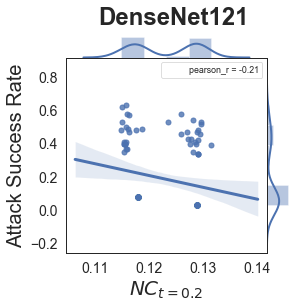

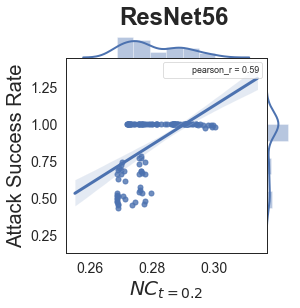

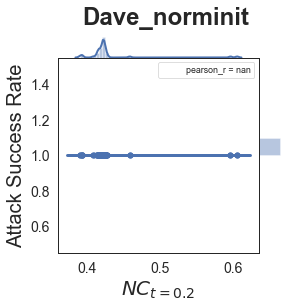

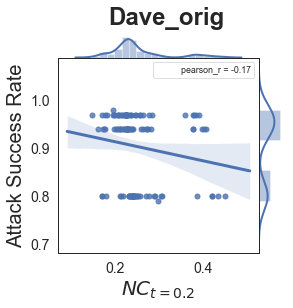

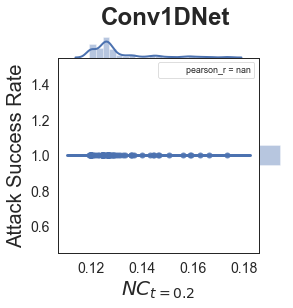

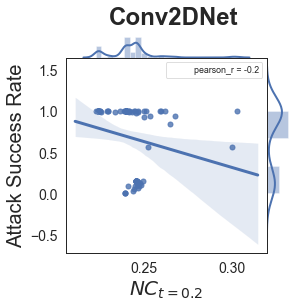

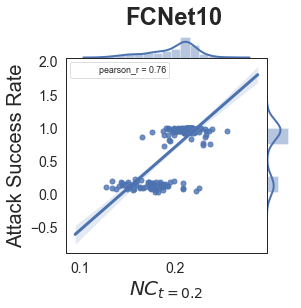

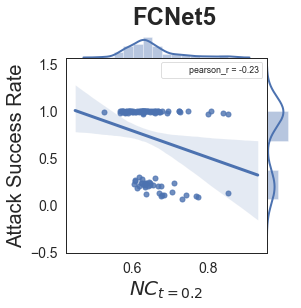

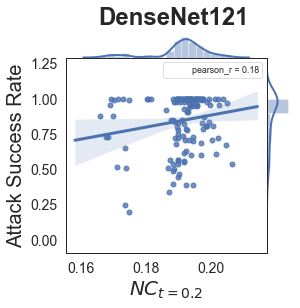

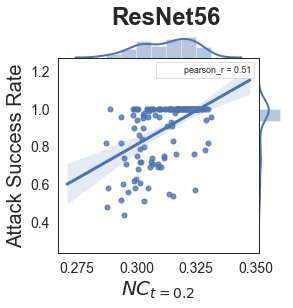

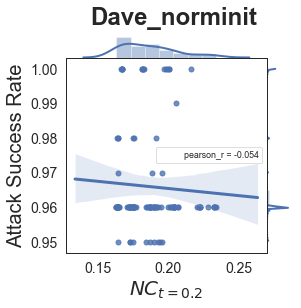

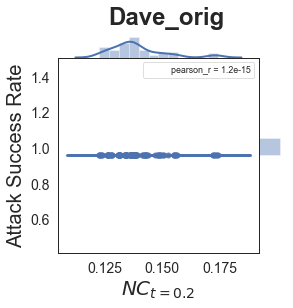

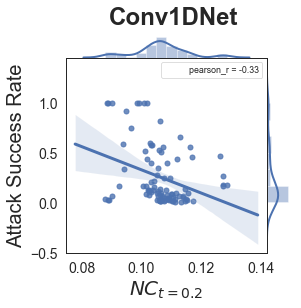

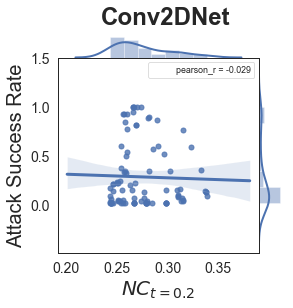

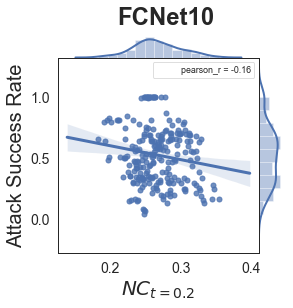

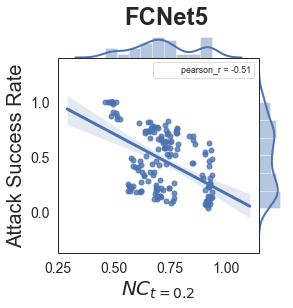

In [23]:
# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'attack_success_rate']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))    
    
    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "attack_success_rate", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,
                           # xlim=(0, 1), 
                           # ylim=(0, 1.3)
                          )

        ax.set_axis_labels('$NC_{t=0.2}$', 'Attack Success Rate')

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig('imgs/nc_020+asr+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: 0.7310723147551234
Model: ResNet56        Attack: cw_div4_attack            Correlation: -0.8708005545000961
Model: Dave_norminit   Attack: cw_div_reg_attack         Correlation: -0.4768221189643154
Model: Dave_orig       Attack: cw_div_reg_attack         Correlation: -0.322839086049235
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: 0.5172841117650668
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: 0.1344908567812983
Model: FCNet10         Attack: cw_div4_attack            Correlation: -0.08801981515773052
Model: FCNet5          Attack: cw_div4_attack            Correlation: 0.5316450481129593
Model: DenseNet121     Attack: pgd_attack                Correlation: 0.15568278969937588
Model: ResNet56        Attack: pgd_attack                Correlation: -0.38326859769844923
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: -0.45846844068795567
Model: Dave_

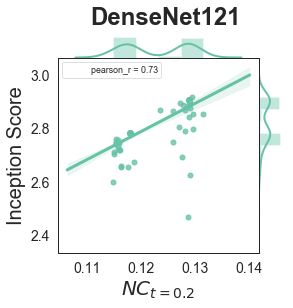

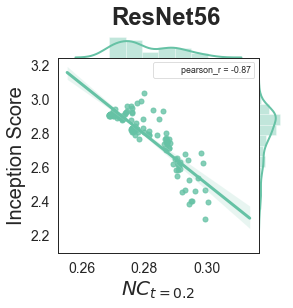

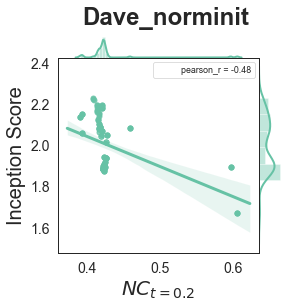

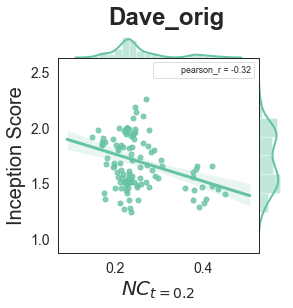

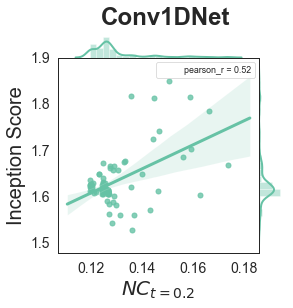

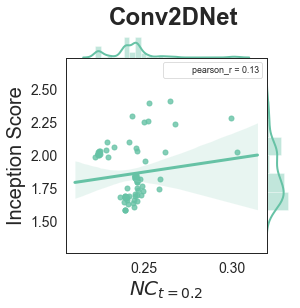

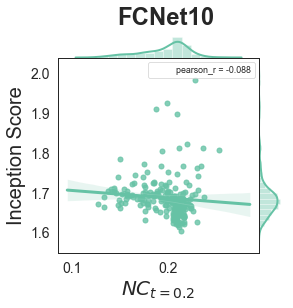

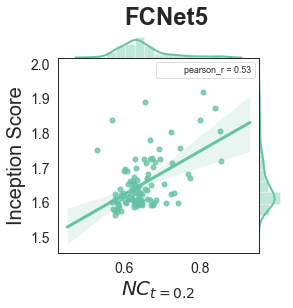

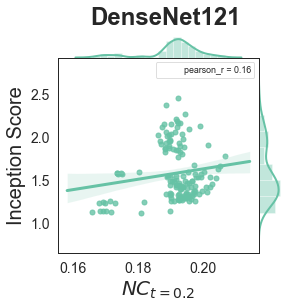

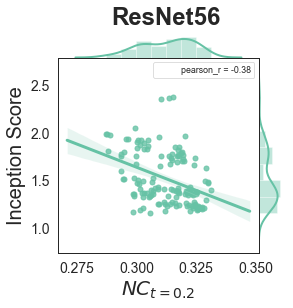

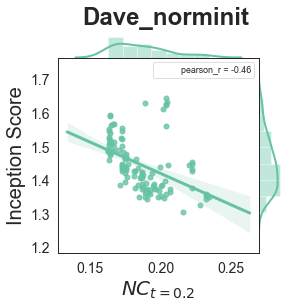

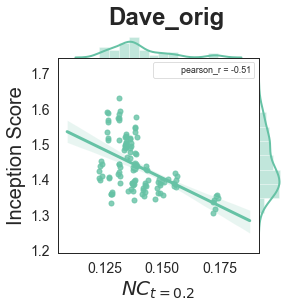

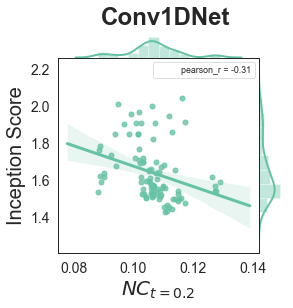

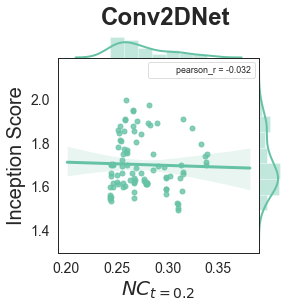

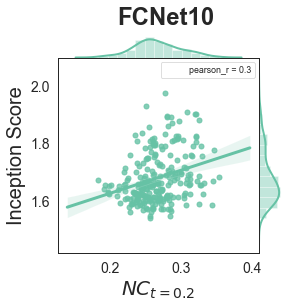

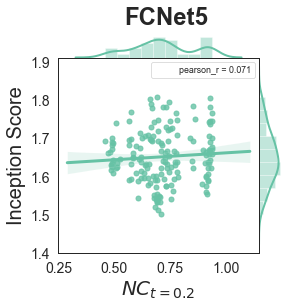

In [24]:
sns.set_palette(sns.color_palette("Set2"))

# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'inception_score']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "inception_score", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,
                           # xlim=(0, 1), 
                           #ylim=(0, 1.3)
                          )

        ax.set_axis_labels('$NC_{t=0.2}$', 'Inception Score') 

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig('imgs/nc_020+is+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: 0.13498929668713835
Model: ResNet56        Attack: cw_div4_attack            Correlation: 0.7557664804084979
Model: Dave_norminit   Attack: cw_div_reg_attack         Correlation: 0.49501647338408344
Model: Dave_orig       Attack: cw_div_reg_attack         Correlation: -0.22188178364635186
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: 0.5966511039857487
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: -0.19183537235107806
Model: FCNet10         Attack: cw_div4_attack            Correlation: 0.6364881203483592
Model: FCNet5          Attack: cw_div4_attack            Correlation: 0.17320590043482828
Model: DenseNet121     Attack: pgd_attack                Correlation: -0.055605566092875244
Model: ResNet56        Attack: pgd_attack                Correlation: 0.42568437680340926
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: 0.7010189601167013
Model: Dav

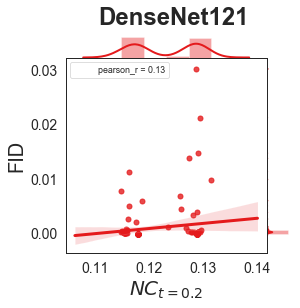

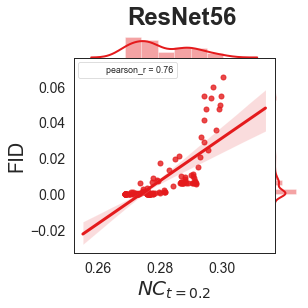

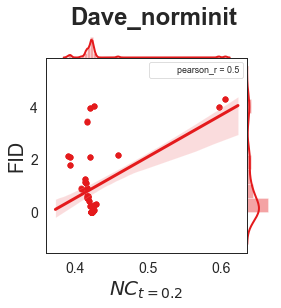

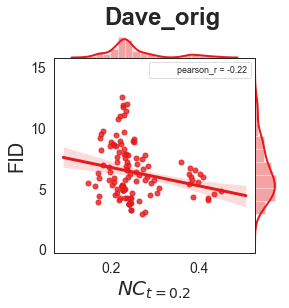

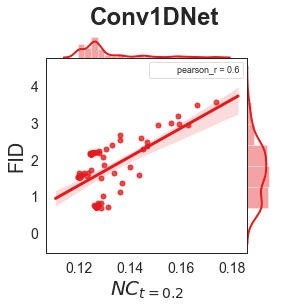

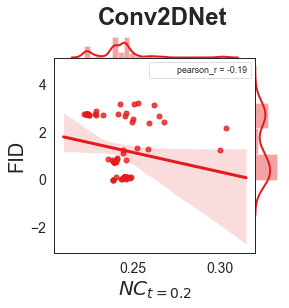

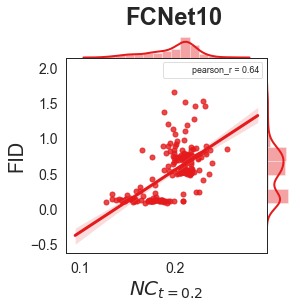

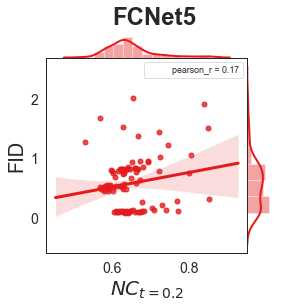

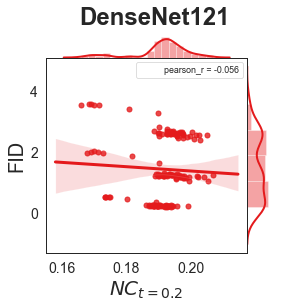

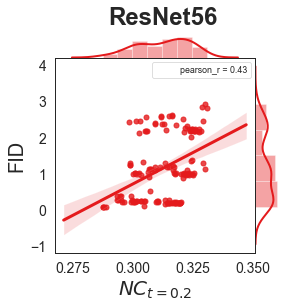

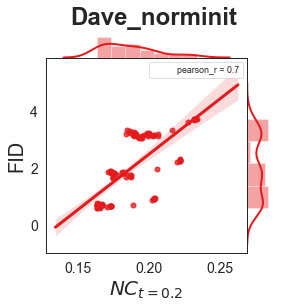

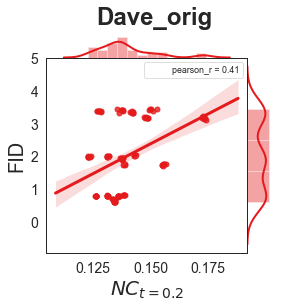

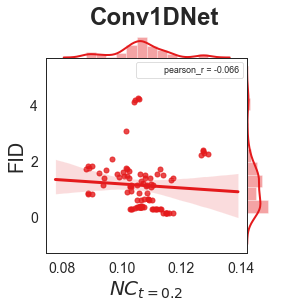

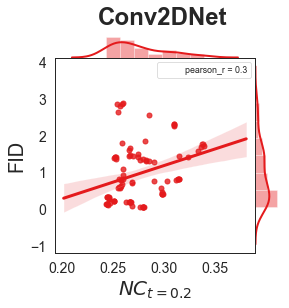

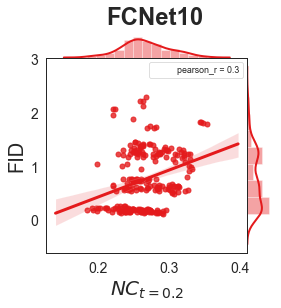

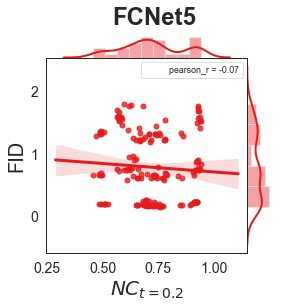

In [25]:
sns.set_palette(sns.color_palette("Set1"))
# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]

    corr = data[['neuron_coverage_020', 'fid_score_2048']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "fid_score_2048", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r,)

        ax.set_axis_labels('$NC_{t=0.2}$', 'FID') 

        plt.suptitle(t=model, weight='bold')
        
        ax.savefig('imgs/nc_020+fid+'+model+'+'+attack+'.png')

Model: DenseNet121     Attack: cw_div4_attack            Correlation: 0.10858811440911288
Model: ResNet56        Attack: cw_div4_attack            Correlation: 0.4512744876161996
Model: Dave_norminit   Attack: cw_div_reg_attack         Correlation: 0.007769231787481583
Model: Dave_orig       Attack: cw_div_reg_attack         Correlation: nan
Model: Conv1DNet       Attack: cw_div4_attack            Correlation: 0.07864980838542539
Model: Conv2DNet       Attack: cw_div4_attack            Correlation: -0.021749667491685765
Model: FCNet10         Attack: cw_div4_attack            Correlation: -0.6962068308518368
Model: FCNet5          Attack: cw_div4_attack            Correlation: 0.4301370182436739
Model: DenseNet121     Attack: pgd_attack                Correlation: -0.180065978456784
Model: ResNet56        Attack: pgd_attack                Correlation: 0.07692446874958478
Model: Dave_norminit   Attack: pgd_attack_reg            Correlation: -0.1766762782756061
Model: Dave_orig       Att

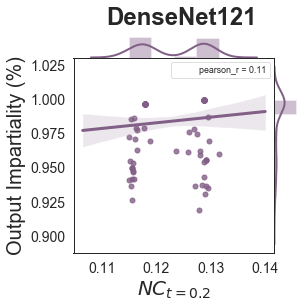

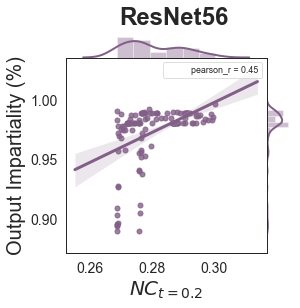

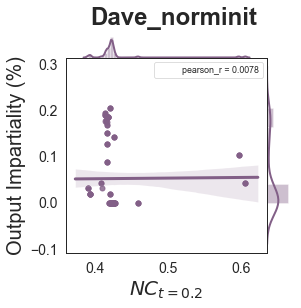

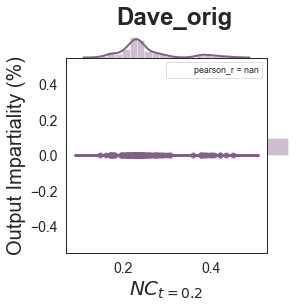

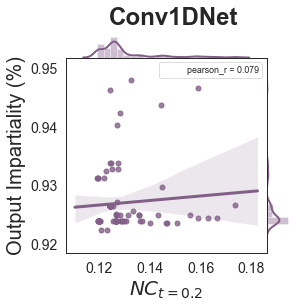

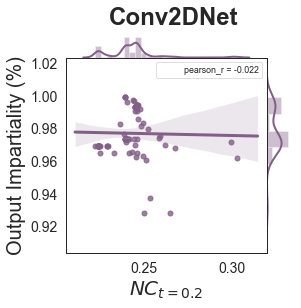

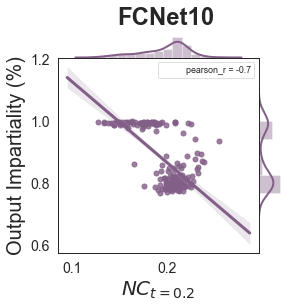

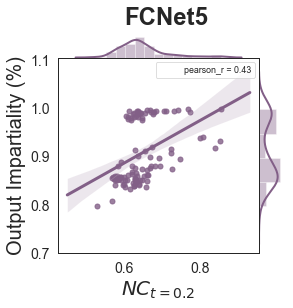

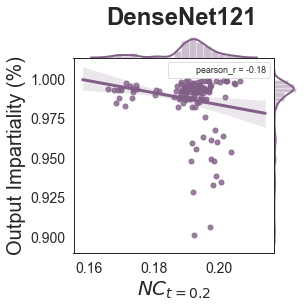

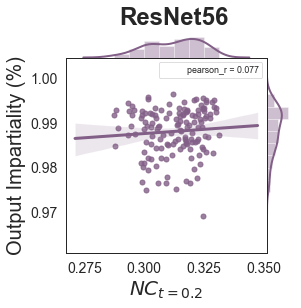

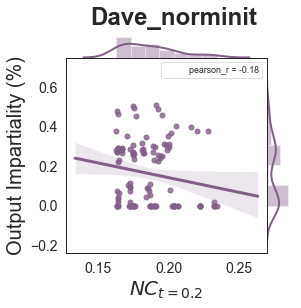

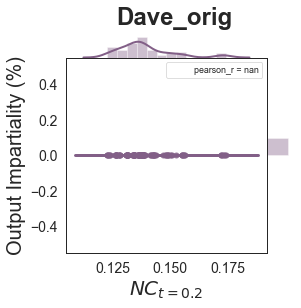

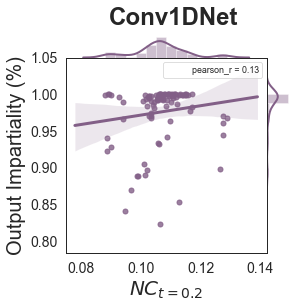

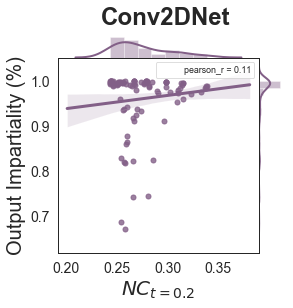

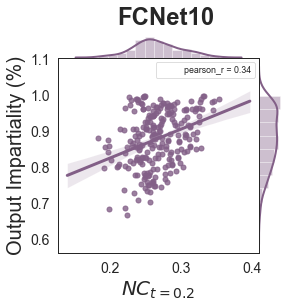

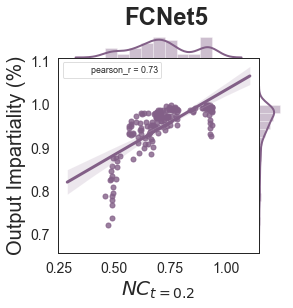

In [26]:
colors = ["dusty purple", "windows blue", "amber", "greyish", "faded green"]
sns.set_palette(sns.xkcd_palette(colors))

# NC-0.2
for model_attack in model_attacks:
    model = model_attack[0]
    attack = model_attack[1]

    model_filter = df['model'] == model
    attack_filter = df['attack'] == attack
    
    data = df[model_filter & attack_filter]
    
    corr = data[['neuron_coverage_020', 'output_impartiality']].corr(method='pearson').iloc[0,1]
    print("Model: {0:15} Attack: {1:25} Correlation: {2}".format(model, attack, corr))  

    if len(data) > 0:
        ax = sns.jointplot(x = "neuron_coverage_020", 
                           y = "output_impartiality", 
                           data=data, 
                           kind="reg",
                           height=4,
                           ratio=9,
                           space=0,
                           stat_func=pearson_r)
        
        ax.set_axis_labels('$NC_{t=0.2}$', 'Output Impartiality (%)')
        
        plt.suptitle(t=model, weight='bold')
        
        ax.savefig('imgs/nc_020+oi+'+model+'+'+attack+'.png')